In [1]:
import os
os.chdir(os.path.join('..', '..', '..'))
print(os.getcwd())

/Users/eharkin/Documents/projects/5HTGIF


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from ezephys.pltools import hide_border

In [3]:
IMG_PATH = os.path.join('figs', 'ims', 'writeup', 'dynamicIV')
NOTEBOOK_PATH = os.path.join('figs', 'scripts', 'writeup')

plt.style.use(os.path.join(NOTEBOOK_PATH, 'publication_figure_style.dms'))

# Load parameter estimates from Alexandre's DynamicIV fits

In [4]:
DATA_PATH = os.path.join('data', 'processed')
dynamic_iv_params = pd.read_csv(os.path.join(DATA_PATH, '5HT', 'dynamicIV_params_5HT.csv'))
dynamic_iv_params['CellType'] = '5HT'
tmp_params = pd.read_csv(os.path.join(DATA_PATH, 'GABA', 'dynamicIV_params_GABA.csv'))
tmp_params['CellType'] = 'GABA'
dynamic_iv_params = pd.concat([dynamic_iv_params, tmp_params], axis=0)
dynamic_iv_params.reset_index(drop=True, inplace=True)
del tmp_params

In [5]:
dynamic_iv_params

,Cell,C,El,gl,Vt_star,DeltaT,FitSuccessful,CellType
0,DRN307,0.090325,-6.577346e+01,9.400180e-04,-4.351563e+01,2.741119,1,5HT
1,DRN308,0.106965,-8.289795e+01,1.128526e-03,-4.394335e+01,2.324268,1,5HT
2,DRN317,0.112054,-6.544831e+01,2.076320e-03,-4.404316e+01,1.757330,1,5HT
3,DRN318,0.090269,-6.418180e+01,1.515088e-03,-4.118352e+01,1.742107,1,5HT
4,DRN319,0.112589,-4.525981e+01,1.215336e-03,-4.602100e+01,2.232644,1,5HT
5,DRN320,0.095270,-8.164882e+01,1.098988e-03,-2.451900e+02,-5.374126,0,5HT
6,DRN321,0.066209,-6.002340e+01,8.030860e-04,-4.422056e+01,1.856605,1,5HT
7,DRN324,0.051241,-6.152399e+01,1.125950e-03,-4.177009e+01,1.959069,1,5HT
8,DRN325,0.050948,-6.310973e+01,1.107788e-03,-4.023437e+01,1.287305,1,5HT
9,DRN327,0.074549,-6.173340e+01,1.194042e-03,-4.113569e+01,1.751605,1,5HT


In [6]:
dynamic_iv_params_cleaned = dynamic_iv_params.loc[dynamic_iv_params['FitSuccessful'] == 1, :]

In [7]:
dynamic_iv_params_cleaned['tau'] = dynamic_iv_params_cleaned['C'] / dynamic_iv_params_cleaned['gl']

/miniconda3/envs/neopozz/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
dynamic_iv_params_cleaned['ThresholdDistance'] = dynamic_iv_params_cleaned['Vt_star'] - dynamic_iv_params_cleaned['El']

/miniconda3/envs/neopozz/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Summary statistics

In [9]:
dynamic_iv_params_cleaned.groupby('CellType').mean()

,C,El,gl,Vt_star,DeltaT,FitSuccessful,tau,ThresholdDistance
CellType,,,,,,,,
5HT,0.079997,-66.666940,0.001248,-42.931773,2.135209,1,66.475810,23.735167
GABA,0.064328,-59.862917,0.001714,-50.811921,2.508844,1,58.197169,9.050995


In [10]:
dynamic_iv_params_cleaned.groupby('CellType').std()

,C,El,gl,Vt_star,DeltaT,FitSuccessful,tau,ThresholdDistance
CellType,,,,,,,,
5HT,0.024725,11.575061,0.000294,3.659660,0.839596,0.0,23.700937,10.311582
GABA,0.027488,13.503873,0.001315,8.809146,1.020676,0.0,44.821208,12.685416


In [11]:
dynamic_iv_params_cleaned.groupby('CellType').sem()

,C,Cell,DeltaT,El,FitSuccessful,ThresholdDistance,Vt_star,gl,tau
CellType,,,,,,,,,
5HT,0.006181,NaN,0.209899,2.893765,0.0,2.577896,0.914915,0.000074,5.925234
GABA,0.007935,NaN,0.294644,3.898232,0.0,3.661964,2.542981,0.000379,12.938768


# Plots and pairwise comparisons

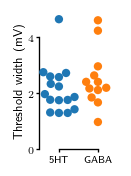

In [11]:
plt.figure(figsize=(1, 1.5))
plt.subplot(111)
plt.subplots_adjust(left=0.3, right=0.95)
sns.swarmplot(y='DeltaT', x='CellType', data=dynamic_iv_params_cleaned, clip_on=False)
plt.yticks([0, 2, 4])
hide_border('tr', trim=True)
plt.ylabel('Threshold width (mV)')
plt.xlabel('')

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'threshold_width.png'))

In [12]:
stats.mannwhitneyu(
    dynamic_iv_params_cleaned.loc[dynamic_iv_params_cleaned['CellType'] == '5HT', 'DeltaT'],
    dynamic_iv_params_cleaned.loc[dynamic_iv_params_cleaned['CellType'] == 'GABA', 'DeltaT'],
    alternative='two-sided'
)

MannwhitneyuResult(statistic=74.0, pvalue=0.31822483718735983)

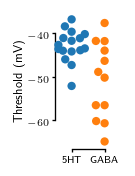

In [13]:
plt.figure(figsize=(1, 1.5))
plt.subplot(111)
plt.subplots_adjust(left=0.4, right=0.95)
sns.swarmplot(y='Vt_star', x='CellType', data=dynamic_iv_params_cleaned, clip_on=False)
hide_border('tr', trim=True)
plt.ylabel('Threshold (mV)')
plt.xlabel('')

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'static_threshold.png'))

In [14]:
stats.mannwhitneyu(
    dynamic_iv_params_cleaned.loc[dynamic_iv_params_cleaned['CellType'] == '5HT', 'Vt_star'],
    dynamic_iv_params_cleaned.loc[dynamic_iv_params_cleaned['CellType'] == 'GABA', 'Vt_star'],
    alternative='two-sided'
)

MannwhitneyuResult(statistic=150.0, pvalue=0.013003437031519488)

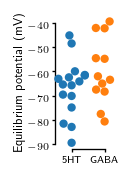

In [15]:
plt.figure(figsize=(1, 1.5))
plt.subplot(111)
plt.subplots_adjust(left=0.4, right=0.95)
sns.swarmplot(y='El', x='CellType', data=dynamic_iv_params_cleaned, clip_on=False)
hide_border('tr', trim=True)
plt.ylabel('Equilibrium potential (mV)')
plt.xlabel('')

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'equilibrium_potential.png'))

In [16]:
stats.mannwhitneyu(
    dynamic_iv_params_cleaned.loc[dynamic_iv_params_cleaned['CellType'] == '5HT', 'El'],
    dynamic_iv_params_cleaned.loc[dynamic_iv_params_cleaned['CellType'] == 'GABA', 'El'],
    alternative='two-sided'
)

MannwhitneyuResult(statistic=70.0, pvalue=0.2364891614598833)

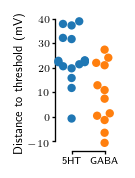

In [17]:
plt.figure(figsize=(1, 1.5))
plt.subplot(111)
plt.subplots_adjust(left=0.4, right=0.95)
sns.swarmplot(y='ThresholdDistance', x='CellType', data=dynamic_iv_params_cleaned, clip_on=False)
hide_border('tr', trim=True)
plt.ylabel('Distance to threshold (mV)')
plt.xlabel('')

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'distance_to_threshold.png'))

In [18]:
stats.mannwhitneyu(
    dynamic_iv_params_cleaned.loc[dynamic_iv_params_cleaned['CellType'] == '5HT', 'ThresholdDistance'],
    dynamic_iv_params_cleaned.loc[dynamic_iv_params_cleaned['CellType'] == 'GABA', 'ThresholdDistance'],
    alternative='two-sided'
)

MannwhitneyuResult(statistic=153.0, pvalue=0.008717292121027226)

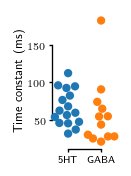

In [19]:
plt.figure(figsize=(1, 1.5))
plt.subplot(111)
plt.subplots_adjust(left=0.4, right=0.95)
sns.swarmplot(
    y=dynamic_iv_params_cleaned['tau'], 
    x=dynamic_iv_params_cleaned['CellType'],
    clip_on=False
)
hide_border('tr', trim=True)
plt.ylabel('Time constant (ms)')
plt.xlabel('')

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'time_constant.png'))

In [20]:
stats.mannwhitneyu(
    dynamic_iv_params_cleaned.loc[dynamic_iv_params_cleaned['CellType'] == '5HT', 'tau'],
    dynamic_iv_params_cleaned.loc[dynamic_iv_params_cleaned['CellType'] == 'GABA', 'tau'],
    alternative='two-sided'
)

MannwhitneyuResult(statistic=131.0, pvalue=0.1092391583165495)